<a href="https://colab.research.google.com/github/monouns/Portfolio-Allocation-tutorial/blob/master/HRP_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Riskfolio

In [1]:
!pip install Riskfolio-Lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [4]:
data = pd.read_csv('./data.csv')

# Find N Ticker

In [5]:
assets = data.columns
Y = data[assets].pct_change().dropna()

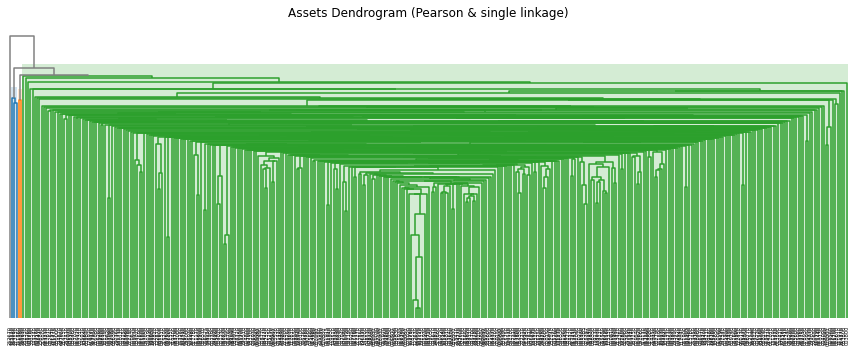

In [6]:
ax = rp.plot_dendrogram(returns=Y,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

In [7]:
port = rp.HCPortfolio(returns=Y)
model='HRP'
codependence = 'pearson'
rm = 'MV'
rf = 0.0178
linkage = 'single'
max_k = 10
leaf_order = True

In [8]:
w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,005930,000660,035420,035720,207940,005935,051910,006400,005380,068270,...,078020,102710,314130,035890,032620,220630,064260,287410,110790,099320
weights,0.0001%,0.0000%,0.0000%,0.0000%,0.0001%,0.0002%,0.0000%,0.0000%,0.0001%,0.0000%,...,0.0002%,0.0001%,0.0000%,0.0000%,0.0000%,0.0006%,0.0000%,0.0003%,0.0001%,0.0000%


In [19]:
w['filter'] = w['weights']>0.0004
w_ = w.loc[w['filter']==True]
w_

,weights,filter
033780,1.6457%,True
030200,0.6055%,True
078930,0.6849%,True
153130,49.8890%,True
214980,47.1748%,True


# Portfolio Allocation

In [10]:
assets = ['033780', '030200', '078930', '153130', '214980'] #data.columns
Y = data[assets].pct_change().dropna()

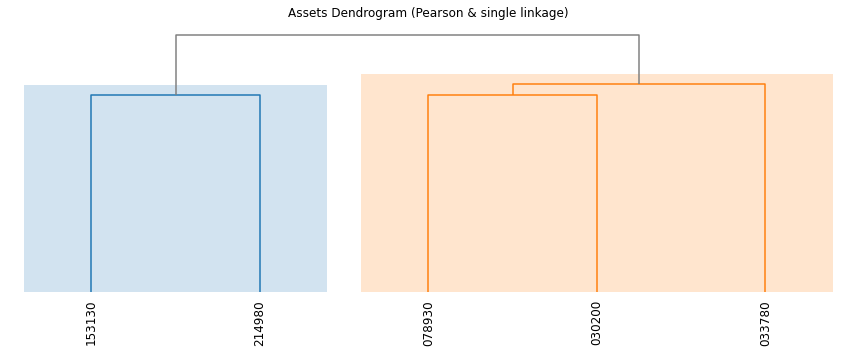

In [11]:
ax = rp.plot_dendrogram(returns=Y,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

In [12]:
port = rp.HCPortfolio(returns=Y)
model='HRP'
codependence = 'pearson'
rm = 'MV'
rf = 0.0178
linkage = 'single'
max_k = 10
leaf_order = True

In [13]:
w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,033780,030200,078930,153130,214980
weights,0.0219%,0.0033%,0.0038%,57.4842%,42.4868%


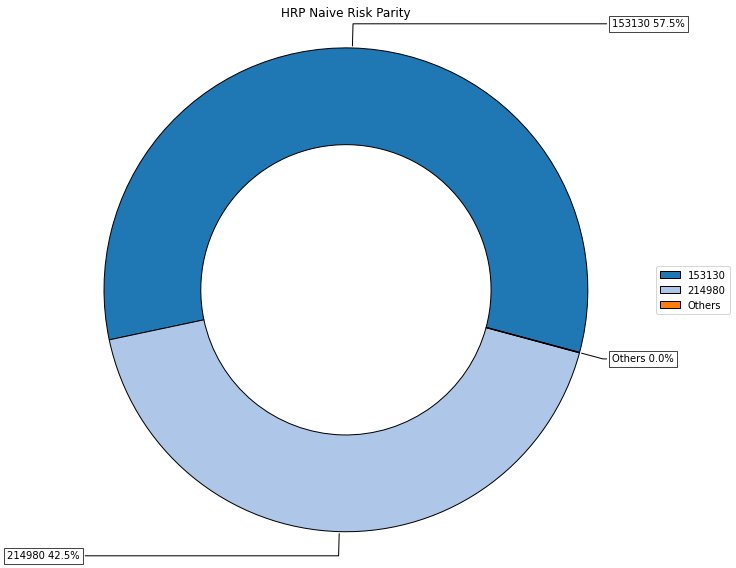

In [14]:
ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

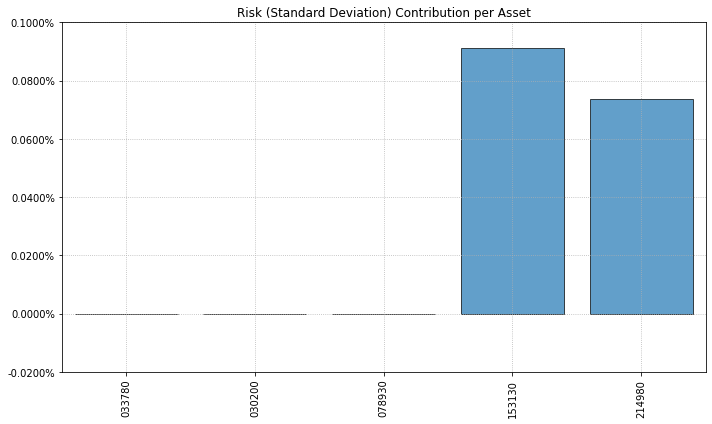

In [15]:
mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

In [16]:
rms = ['vol', 'MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'VaR','CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel',
       'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          correlation=codependence,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,MSV,FLPM,SLPM,VaR,CVaR,EVaR,WR,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
033780,0.70%,0.02%,0.62%,0.68%,13.25%,14.16%,0.69%,0.66%,0.68%,0.68%,1.23%,1.35%,1.59%,1.41%,1.34%,1.64%,1.24%,1.35%,1.56%,1.41%,1.35%,1.65%
030200,0.27%,0.00%,0.24%,0.29%,13.25%,12.07%,0.31%,0.34%,0.37%,0.40%,0.71%,0.49%,0.61%,0.67%,0.70%,0.61%,0.70%,0.48%,0.60%,0.66%,0.69%,0.61%
078930,0.43%,0.00%,0.40%,0.48%,25.31%,22.57%,0.45%,0.51%,0.60%,0.66%,0.79%,0.48%,0.71%,0.85%,0.81%,0.68%,0.80%,0.48%,0.71%,0.86%,0.83%,0.68%
153130,53.02%,57.48%,51.50%,54.57%,24.09%,25.59%,49.17%,54.85%,58.95%,57.71%,56.10%,46.32%,51.92%,54.66%,55.47%,49.89%,56.10%,46.32%,51.93%,54.66%,55.47%,49.89%
214980,45.58%,42.49%,47.23%,43.97%,24.11%,25.61%,49.39%,43.64%,39.39%,40.54%,41.16%,51.36%,45.17%,42.42%,41.67%,47.17%,41.17%,51.37%,45.19%,42.41%,41.66%,47.17%


<AxesSubplot:>

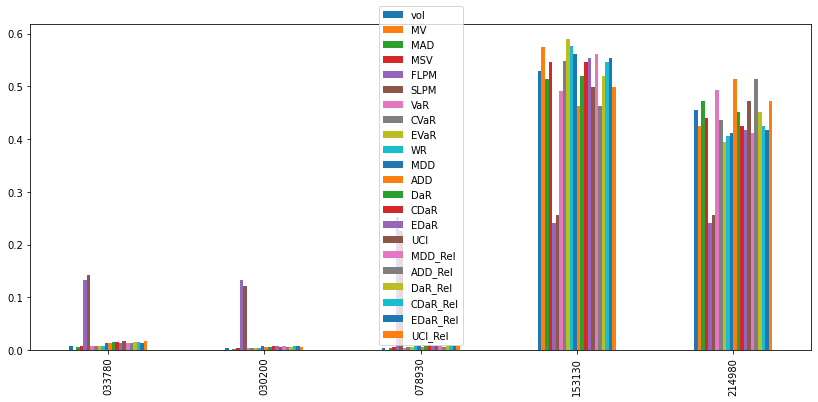

In [17]:
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [22]:
stock_list = pd.read_csv('./stock_list.csv')
stock_list['종목코드'] = stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
stock_list.set_index('종목코드', inplace=True)

w_trade = pd.concat([w, stock_list['종목명'].loc[w.index.values]], axis=1)
w_trade

,weights,filter,종목명
033780,1.6457%,True,KT&G
030200,0.6055%,True,KT
078930,0.6849%,True,GS
153130,49.8890%,True,KODEX 단기채권
214980,47.1748%,True,KODEX 단기채권PLUS
